In [ ]:
! pip install --upgrade xlrd

     |████████████████████████████████| 96 kB 2.1 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


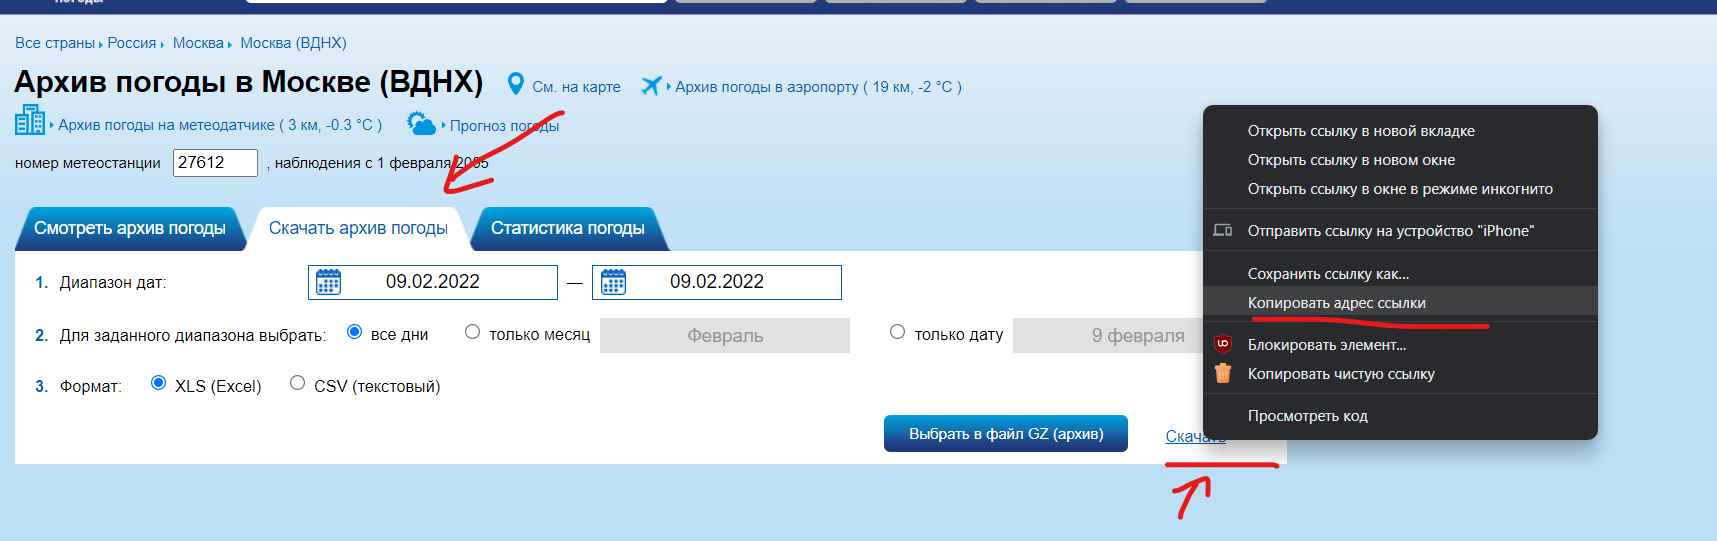

In [ ]:
# Скачивание файла (подставить свою ссылку c сайта 'https://rp5.ru/Архив_погоды_в_Москве_(ВДНХ)' )
!wget -O "weather.xls.gz" "http://37.9.3.250/download/files.synop/27/27612.08.02.2015.09.02.2022.1.0.0.ru.utf8.00000000.xls.gz"
# Распаковка архива
!gzip -df "weather.xls.gz"

--2022-02-08 21:53:20--  http://37.9.3.250/download/files.synop/27/27612.08.02.2015.09.02.2022.1.0.0.ru.utf8.00000000.xls.gz
Connecting to 37.9.3.250:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1861821 (1.8M) [application/octet-stream]
Saving to: ‘weather.xls.gz’

weather.xls.gz      100%[===================>]   1.78M   922KB/s    in 2.0s    

2022-02-08 21:53:22 (922 KB/s) - ‘weather.xls.gz’ saved [1861821/1861821]



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data = pd.read_excel('weather.xls', skiprows=6)
data = data[data['T'].notna()]
data = data[data['Po'].notna()]
# Преобразуем российский формат дат для дальнейшего анализа
data['date'] = pd.to_datetime(data['Местное время в Москве (ВДНХ)'], dayfirst=True)

In [ ]:
data.head()

,Местное время в Москве (ВДНХ),T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,W1,W2,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss,date
0,09.02.2022 00:00,-0.9,740.8,754.9,0.0,83.0,"Ветер, дующий с западо-юго-запада",1,NaN,NaN,100%.,Состояние неба в общем не изменилось.,Снег или дождь со снегом.,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,20,-3.5,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-09 00:00:00
1,08.02.2022 21:00,-0.3,740.8,754.9,0.0,89.0,"Ветер, дующий с юго-запада",1,NaN,NaN,"90 или более, но не 100%",Снег непрерывный слабый в срок наблюдения.,Снег или дождь со снегом.,Облака покрывали более половины неба в течение...,NaN,2.1,Слоистые разорванные или кучевые разорванные о...,"90 или более, но не 100%",300-600,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",7,-1.9,0.3,12.0,NaN,NaN,NaN,NaN,2022-02-08 21:00:00
2,08.02.2022 18:00,0.7,740.8,754.8,0.5,83.0,"Ветер, дующий с западо-юго-запада",1,NaN,NaN,"90 или более, но не 100%",,NaN,NaN,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",70 – 80%.,300-600,"Высококучевые просвечивающие, расположенные на...","Перистых, перисто-кучевых или перисто-слоистых...",10,-1.9,Осадков нет,12.0,NaN,NaN,NaN,NaN,2022-02-08 18:00:00
3,08.02.2022 15:00,1.7,740.3,754.2,-0.2,77.0,"Ветер, дующий с юга",1,NaN,NaN,100%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,1000-1500,NaN,NaN,20,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-08 15:00:00
4,08.02.2022 12:00,1.6,740.5,754.4,0.4,74.0,"Ветер, дующий с юго-юго-востока",1,NaN,NaN,100%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,1000-1500,NaN,NaN,20,-2.6,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-08 12:00:00


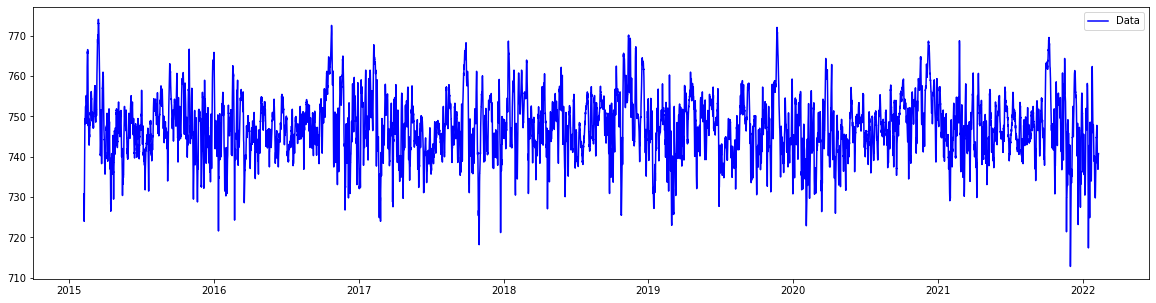

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(data['date'], data['Po'], color='blue', label='Data')
plt.legend()

In [ ]:
data['dayofyear'] = data['date'].dt.dayofyear

In [ ]:
import numpy as np
data['cos_dayofyear'] = np.cos((data['dayofyear']-1) / 366 * 2 * np.pi)

In [ ]:
data_train = data[data['date'] < '2020-01-01']
data_test = data[data['date'] >= '2020-01-01']

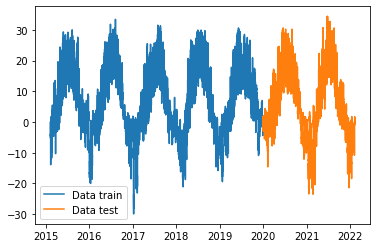

In [ ]:
plt.plot(data_train['date'], data_train['T'], label='Data train')
plt.plot(data_test['date'], data_test['T'], label='Data test')
plt.legend()

In [ ]:
X_train = pd.DataFrame()
X_train['cos_dayofyear'] = data_train['cos_dayofyear']

X_test = pd.DataFrame()
X_test['cos_dayofyear'] = data_test['cos_dayofyear']


y_train = data_train['T']
y_test = data_test['T']

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [ ]:
data['cos_dayofyear'] = np.cos((data['dayofyear']-1) / 366 * 2 * np.pi)

data_train = data[data['date'] < '2020-01-01']
data_test = data[data['date'] >= '2020-01-01']

X_train = pd.DataFrame()
X_train['cos_dayofyear'] = data_train['cos_dayofyear']
X_train['Po'] = data_train['Po']

X_test = pd.DataFrame()
X_test['cos_dayofyear'] = data_test['cos_dayofyear']
X_test['Po'] = data_test['Po']

y_train = data_train['T']
y_test = data_test['T']

In [ ]:
# Добавили фичу Po (Атмосферное давление)
X_test.head()

,cos_dayofyear,Po
0,0.784120,740.8
1,0.794658,740.8
2,0.794658,740.8
3,0.794658,740.3
4,0.794658,740.5


In [ ]:
model.fit(X_train, y_train)

LinearRegression()

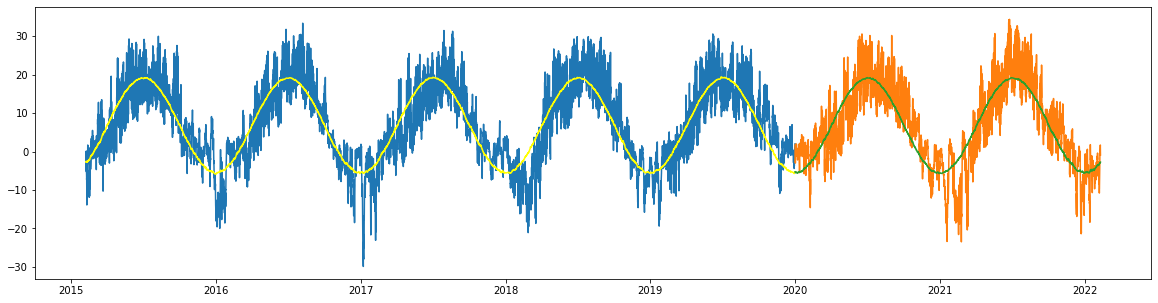

In [ ]:
pred_train = model.predict(X_train)

pred_test = model.predict(X_test)

plt.figure(figsize=(20, 5))
plt.plot(data_train['date'], y_train)
plt.plot(data_test['date'], y_test)
plt.plot(data_train['date'], pred_train, color='yellow')
plt.plot(data_test['date'], pred_test)

In [ ]:
from sklearn.metrics import mean_absolute_error

print('Средняя ошибка на тестовой выборке =', mean_absolute_error(y_test, pred_test))

Средняя ошибка на тестовой выборке = 4.4415648582199365


In [ ]:
X_train_doy = pd.DataFrame()
X_train_doy['cos_dayofyear'] = data_train['cos_dayofyear']

X_test_doy = pd.DataFrame()
X_test_doy['cos_dayofyear'] = data_test['cos_dayofyear']

y_train_doy = data_train['T']
y_test_doy = data_test['T']

In [ ]:
modelDoy = LinearRegression()
modelDoy.fit(X_train_doy, y_train_doy)

LinearRegression()

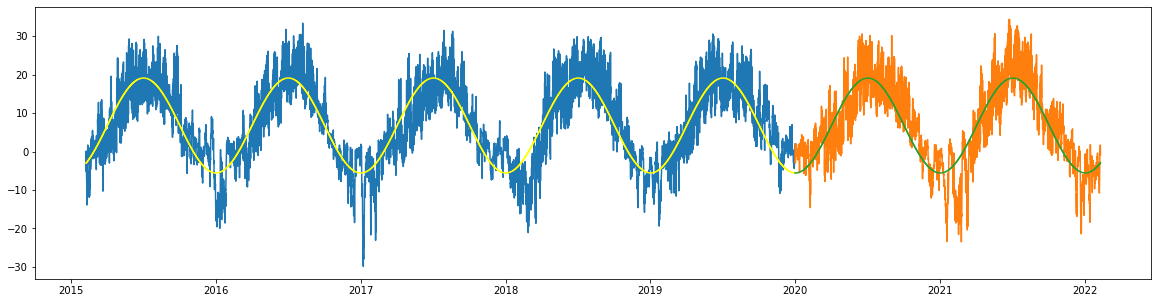

In [ ]:

pred_train_doy = modelDoy.predict(X_train_doy)

pred_test_doy = modelDoy.predict(X_test_doy)

plt.figure(figsize=(20, 5))
plt.plot(data_train['date'], y_train_doy)
plt.plot(data_test['date'], y_test_doy)
plt.plot(data_train['date'], pred_train_doy, color='yellow')
plt.plot(data_test['date'], pred_test_doy)

In [ ]:
print('Средняя ошибка на тестовой выборке =', mean_absolute_error(y_test_doy, pred_test_doy))

Средняя ошибка на тестовой выборке = 4.451531694885562


In [ ]:
print('doy + Po')
print('Средняя ошибка на обучающей выборке =', mean_absolute_error(y_train, pred_train))
print('Средняя ошибка на тестовой выборке =', mean_absolute_error(y_test, pred_test))

print('\ndoy only')
print('Средняя ошибка на обучающей выборке =', mean_absolute_error(y_train_doy, pred_train_doy))
print('Средняя ошибка на тестовой выборке =', mean_absolute_error(y_test_doy, pred_test_doy))

doy + Po
Средняя ошибка на обучающей выборке = 4.153366136985323
Средняя ошибка на тестовой выборке = 4.4415648582199365

doy only
Средняя ошибка на обучающей выборке = 4.156686340557706
Средняя ошибка на тестовой выборке = 4.451531694885562


In [ ]:
# Используя дополнительно фичу "Атмосферное давление на уровне станции" (Po) при обучении модели наша средняя ошибка стала (немного) меньше. 
# Используя DayOfYear + Po ------>  4.4415648582199365
# Используя толькл DayOfYear ---->  4.451531694885562

Средняя ошибка на обучающей выборке = 3.4477431569091728
Средняя ошибка на тестовой выборке = 4.317292463495433


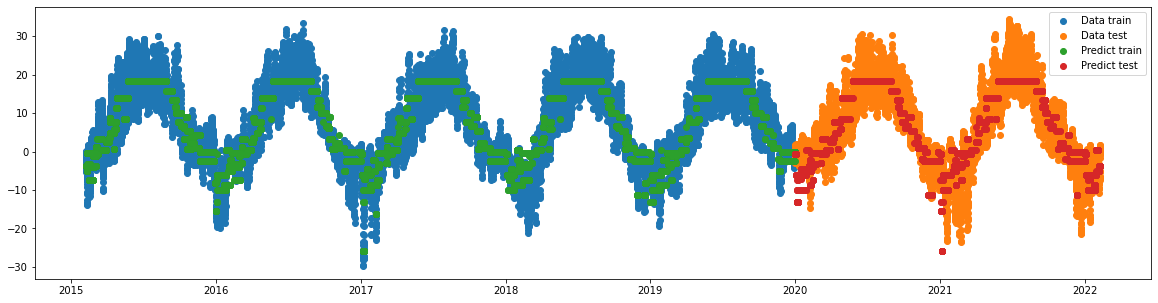

In [ ]:
from sklearn.tree import DecisionTreeRegressor 

data_train = data[data['date'] < '2020-01-01']
data_test = data[data['date'] >= '2020-01-01']


X_train_Po = pd.DataFrame()
X_train_Po['dayofyear'] = data_train['dayofyear']
X_train_Po['Po'] = data_train['Po']



X_test_Po = pd.DataFrame() # Используем Po + doy
X_test_Po['dayofyear'] = data_test['dayofyear'] # doy
X_test_Po['Po'] = data_test['Po']  # Po

y_train_Po = data_train['T']
y_test_Po = data_test['T']


model_Po = DecisionTreeRegressor(max_depth=6)  # Подобрали оптимальну ю глубину дерева
model_Po.fit(X_train_Po, y_train_Po)


pred_train_Po = model_Po.predict(X_train_Po)
pred_test_Po = model_Po.predict(X_test_Po)

plt.figure(figsize=(20, 5))
plt.scatter(data_train['date'], y_train_Po, label='Data train')
plt.scatter(data_test['date'], y_test_Po, label='Data test')
plt.scatter(data_train['date'], pred_train_Po, label='Predict train')
plt.scatter(data_test['date'], pred_test_Po, label='Predict test')
plt.legend()

print('Средняя ошибка на обучающей выборке =', mean_absolute_error(y_train_Po, pred_train_Po))
print('Средняя ошибка на тестовой выборке =', mean_absolute_error(y_test_Po, pred_test_Po))

Средняя ошибка на обучающей выборке = 3.32499974029388
Средняя ошибка на тестовой выборке = 4.379291177754434


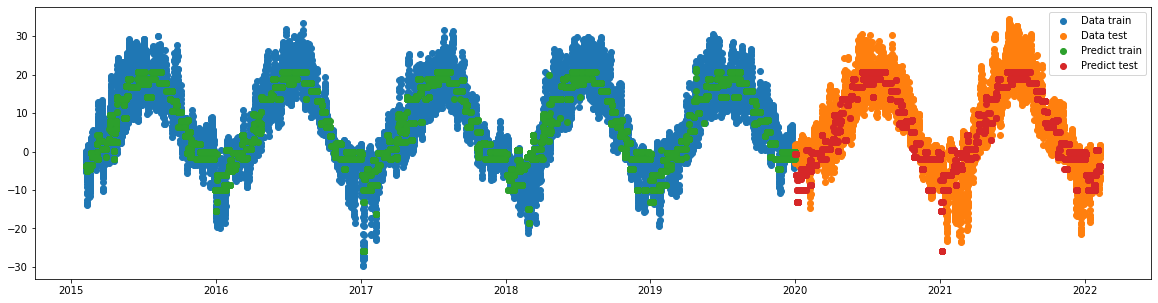

In [ ]:
data['dayofyear'] = data['date'].dt.dayofyear 
data['cos_dayofyear'] = np.cos((data['dayofyear'] - 1) / 366 * 2 * np.pi)

data_train = data[data['date'] < '2020-01-01']
data_test = data[data['date'] >= '2020-01-01']


X_train_DT = pd.DataFrame()
X_train_DT['dayofyear'] = data_train['dayofyear'] 
X_train_DT['cos_dayofyear'] = data_train['cos_dayofyear']
X_train_DT['Po'] = data_train['Po']



X_test_DT = pd.DataFrame() # Используем три фичи
X_test_DT['dayofyear'] = data_test['dayofyear']  # Day Of Year 
X_test_DT['cos_dayofyear'] = data_test['cos_dayofyear'] # Cos Day Of Year
X_test_DT['Po'] = data_test['Po']  # Po

y_train_DT = data_train['T']
y_test_DT = data_test['T']


model_DT = DecisionTreeRegressor(max_depth=7)
model_DT.fit(X_train_DT, y_train_DT)


pred_train_DT = model_DT.predict(X_train_DT)
pred_test_DT = model_DT.predict(X_test_DT)

plt.figure(figsize=(20, 5))
plt.scatter(data_train['date'], y_train_DT, label='Data train')
plt.scatter(data_test['date'], y_test_DT, label='Data test')
plt.scatter(data_train['date'], pred_train_DT, label='Predict train')
plt.scatter(data_test['date'], pred_test_DT, label='Predict test')
plt.legend()

print('Средняя ошибка на обучающей выборке =', mean_absolute_error(y_train_DT, pred_train_DT))
print('Средняя ошибка на тестовой выборке =', mean_absolute_error(y_test_DT, pred_test_DT))

# Результаты:

# 1) Linear Regression
  # 1.1) doy + Po
    # Средняя ошибка на обучающей выборке   = 4.153366136985323
    # Средняя ошибка на тестовой выборке    = 4.4415648582199365

  # 1.2) doy only
    # Средняя ошибка на обучающей выборке   = 4.156686340557706
    # Средняя ошибка на тестовой выборке    = 4.451531694885562

# 2) Decision Tree Regressor
  # 2.1) Po + doy + подбор глубины
    # Средняя ошибка на обучающей выборке   = 3.4477431569091728
    # Средняя ошибка на тестовой выборке    = 4.317292463495433       <----- Лучший результат!
  
  # 2.2) Po + doy + cos_doy
    # Средняя ошибка на обучающей выборке   = 3.32499974029388
    # Средняя ошибка на тестовой выборке    = 4.379291177754434


# Напишем теперь программу котрая будет предсказывать температуру на определённый день используя наилучшую модель:

In [ ]:
# Введите дату, в день которой вы хотите предсказать ткмпературу:
today = '2022-02-09'

data_train = data[data['date'] < '2020-01-01']
data_test = data[data['date'] >= '2020-01-01']


X_train_best = pd.DataFrame()
X_train_best['dayofyear'] = data_train['dayofyear']
X_train_best['Po'] = data_train['Po']

d = {'date': [today]}
df_today = pd.DataFrame(data=d)
df_today['date'] = pd.to_datetime(df_today.date, format='%Y-%m-%d')


X_test_best = pd.DataFrame() 
X_test_best['dayofyear'] = df_today['date'].dt.dayofyear 
X_test_best['Po'] = data_test['Po'] 

y_train_best = data_train['T']
y_test_best = data_test['T']


model_best = DecisionTreeRegressor(max_depth=6) 
model_best.fit(X_train_best, y_train_best)


pred_train_best = model_Po.predict(X_train_best)
pred_test_best = model_Po.predict(X_test_best)


print('Температура в день', today, 'будет примерно равняться', round(pred_test_best[0],2), '°C')

Температура в день 2022-02-09 будет примерно равняться -3.64 °C
